# AMS Solar Energy Prediction Contest

In [111]:
#importing libraries
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import netCDF4 as nc
import matplotlib.pyplot as plt

## Exploratory Data Analysis

In [112]:
#importing train data
main_df=pd.read_csv('train.csv')
main_df.columns

Index(['Date', 'ACME', 'ADAX', 'ALTU', 'APAC', 'ARNE', 'BEAV', 'BESS', 'BIXB',
       'BLAC', 'BOIS', 'BOWL', 'BREC', 'BRIS', 'BUFF', 'BURB', 'BURN', 'BUTL',
       'BYAR', 'CAMA', 'CENT', 'CHAN', 'CHER', 'CHEY', 'CHIC', 'CLAY', 'CLOU',
       'COOK', 'COPA', 'DURA', 'ELRE', 'ERIC', 'EUFA', 'FAIR', 'FORA', 'FREE',
       'FTCB', 'GOOD', 'GUTH', 'HASK', 'HINT', 'HOBA', 'HOLL', 'HOOK', 'HUGO',
       'IDAB', 'JAYX', 'KENT', 'KETC', 'LAHO', 'LANE', 'MADI', 'MANG', 'MARE',
       'MAYR', 'MCAL', 'MEDF', 'MEDI', 'MIAM', 'MINC', 'MTHE', 'NEWK', 'NINN',
       'NOWA', 'OILT', 'OKEM', 'OKMU', 'PAUL', 'PAWN', 'PERK', 'PRYO', 'PUTN',
       'REDR', 'RETR', 'RING', 'SALL', 'SEIL', 'SHAW', 'SKIA', 'SLAP', 'SPEN',
       'STIG', 'STIL', 'STUA', 'SULP', 'TAHL', 'TALI', 'TIPT', 'TISH', 'VINI',
       'WASH', 'WATO', 'WAUR', 'WEAT', 'WEST', 'WILB', 'WIST', 'WOOD', 'WYNO'],
      dtype='object')

In [113]:
main_df.head()

,Date,ACME,ADAX,ALTU,APAC,ARNE,BEAV,BESS,BIXB,BLAC,...,VINI,WASH,WATO,WAUR,WEAT,WEST,WILB,WIST,WOOD,WYNO
0,19940101,12384900,11930700,12116700,12301200,10706100,10116900,11487900,11182800,10848300,...,10771800,12116400,11308800,12361800,11331600,10644300,11715600,11241000,10490100,10545300
1,19940102,11908500,9778500,10862700,11666400,8062500,9262800,9235200,3963300,3318300,...,4314300,10733400,9154800,12041400,9168300,4082700,9228000,5829900,7412100,3345300
2,19940103,12470700,9771900,12627300,12782700,11618400,10789800,11895900,4512600,5266500,...,2976900,11775000,10700400,12687300,11324400,2746500,3686700,4488900,9712200,4442100
3,19940104,12725400,6466800,13065300,12817500,12134400,11816700,12186600,3212700,8270100,...,3476400,12159600,11907000,12953100,11903700,2741400,4905000,4089300,11401500,4365000
4,19940105,10894800,11545200,8060400,10379400,6918600,9936300,6411300,9566100,8009400,...,6393300,11419500,7334400,10178700,7471500,8235300,11159100,10651500,10006200,8568300


In [114]:
#NULL VALUE CHECKING
(main_df[['IDAB','HINT','SLAP','WEST','BESS','ACME']].isna()).value_counts()

IDAB   HINT   SLAP   WEST   BESS   ACME 
False  False  False  False  False  False    4018
dtype: int64

NO NULL VALUES IN THE FEATURE COLUMNS

In [115]:
main_df[['IDAB','HINT','SLAP','WEST','BESS','ACME']].describe()

,IDAB,HINT,SLAP,WEST,BESS,ACME
count,4.018000e+03,4.018000e+03,4.018000e+03,4.018000e+03,4.018000e+03,4.018000e+03
mean,1.568717e+07,1.691439e+07,1.742617e+07,1.518480e+07,1.732511e+07,1.689670e+07
std,7.877536e+06,7.858863e+06,7.890201e+06,8.077492e+06,7.999386e+06,7.981281e+06
min,1.200000e+03,5.052000e+05,1.350000e+04,3.600000e+04,5.106000e+05,7.206000e+05
25%,9.555900e+06,1.141132e+07,1.151062e+07,9.422925e+06,1.165868e+07,1.138028e+07
50%,1.576905e+07,1.691220e+07,1.739475e+07,1.461645e+07,1.730205e+07,1.696785e+07
75%,2.253382e+07,2.386080e+07,2.426055e+07,2.206905e+07,2.436232e+07,2.392290e+07
max,3.944280e+07,3.137460e+07,3.235560e+07,3.203010e+07,3.188790e+07,3.134790e+07


In [116]:
main_df.shape

(4018, 99)

Dataset contains 4018 rows and 99 coloumns

#### Outlier Analysis

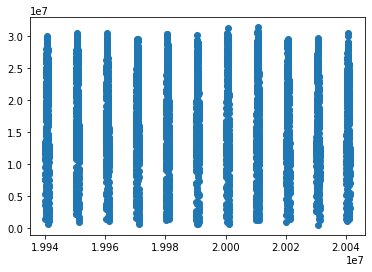

In [117]:
plt.scatter(main_df['Date'],main_df['HINT'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1c771cbe280>,
 'caps': [<matplotlib.lines.Line2D at 0x1c771cbe100>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c7719ecd30>],
 'medians': [<matplotlib.lines.Line2D at 0x1c771aa4820>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c771aa4940>],
 'means': []}

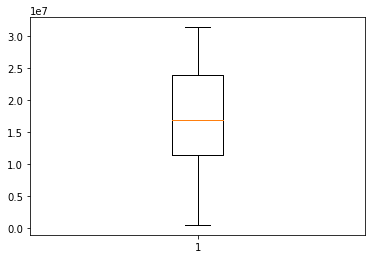

In [118]:
plt.boxplot(main_df['HINT'])

In [119]:
main_df.head()

,Date,ACME,ADAX,ALTU,APAC,ARNE,BEAV,BESS,BIXB,BLAC,...,VINI,WASH,WATO,WAUR,WEAT,WEST,WILB,WIST,WOOD,WYNO
0,19940101,12384900,11930700,12116700,12301200,10706100,10116900,11487900,11182800,10848300,...,10771800,12116400,11308800,12361800,11331600,10644300,11715600,11241000,10490100,10545300
1,19940102,11908500,9778500,10862700,11666400,8062500,9262800,9235200,3963300,3318300,...,4314300,10733400,9154800,12041400,9168300,4082700,9228000,5829900,7412100,3345300
2,19940103,12470700,9771900,12627300,12782700,11618400,10789800,11895900,4512600,5266500,...,2976900,11775000,10700400,12687300,11324400,2746500,3686700,4488900,9712200,4442100
3,19940104,12725400,6466800,13065300,12817500,12134400,11816700,12186600,3212700,8270100,...,3476400,12159600,11907000,12953100,11903700,2741400,4905000,4089300,11401500,4365000
4,19940105,10894800,11545200,8060400,10379400,6918600,9936300,6411300,9566100,8009400,...,6393300,11419500,7334400,10178700,7471500,8235300,11159100,10651500,10006200,8568300


{'whiskers': [<matplotlib.lines.Line2D at 0x1c771e243d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c771e24490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c771e24cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c771e3f100>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c771e3f610>],
 'means': []}

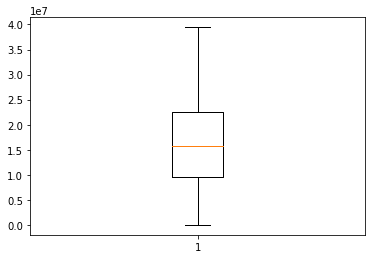

In [120]:
plt.boxplot(main_df['IDAB'])

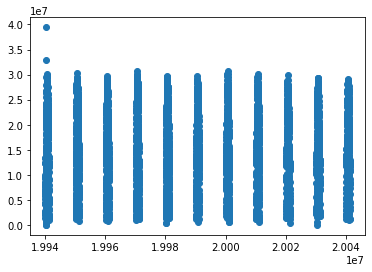

In [121]:
plt.scatter(main_df['Date'],main_df['IDAB'])
plt.show()

In [122]:
max(main_df['IDAB'])

39442800

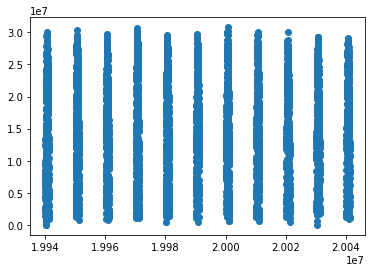

In [123]:
#Replacing Outlier Points with Population mean
main_df['IDAB'].replace({max(main_df['IDAB']):main_df['IDAB'].mean()},inplace=True)
main_df['IDAB'].replace({max(main_df['IDAB']):main_df['IDAB'].mean()},inplace=True)

plt.scatter(main_df['Date'],main_df['IDAB'])
plt.show()

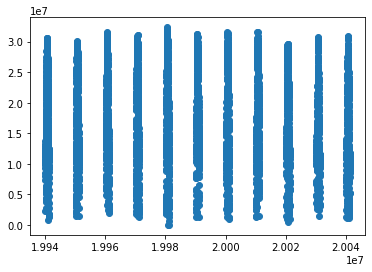

In [124]:
plt.scatter(main_df['Date'],main_df['SLAP'])
plt.show()

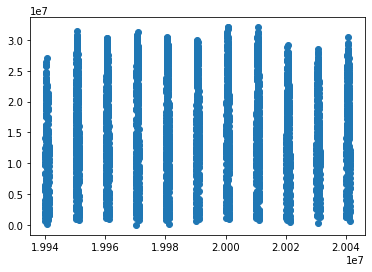

In [125]:
plt.scatter(main_df['Date'],main_df['WEST'])
plt.show()

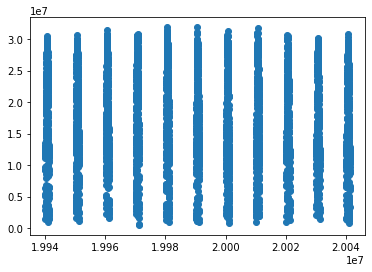

In [126]:
plt.scatter(main_df['Date'],main_df['BESS'])
plt.show()

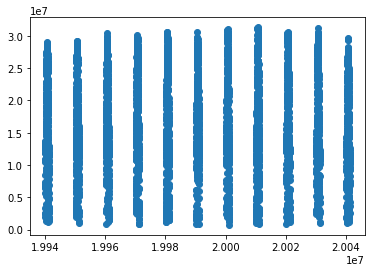

In [127]:
plt.scatter(main_df['Date'],main_df['ACME'])
plt.show()

In [128]:
def get_avarage_energy(station):
    return main_df[station].mean()

def get_stationinfo(station):
    df=pd.read_csv('station_info.csv')
    df.loc[df['stid'] == station]
    df.drop(['stid'],axis=1)
    return df

In [129]:
stations=main_df.columns.to_numpy()
stations=np.delete(stations,0)

In [130]:
stations

array(['ACME', 'ADAX', 'ALTU', 'APAC', 'ARNE', 'BEAV', 'BESS', 'BIXB',
       'BLAC', 'BOIS', 'BOWL', 'BREC', 'BRIS', 'BUFF', 'BURB', 'BURN',
       'BUTL', 'BYAR', 'CAMA', 'CENT', 'CHAN', 'CHER', 'CHEY', 'CHIC',
       'CLAY', 'CLOU', 'COOK', 'COPA', 'DURA', 'ELRE', 'ERIC', 'EUFA',
       'FAIR', 'FORA', 'FREE', 'FTCB', 'GOOD', 'GUTH', 'HASK', 'HINT',
       'HOBA', 'HOLL', 'HOOK', 'HUGO', 'IDAB', 'JAYX', 'KENT', 'KETC',
       'LAHO', 'LANE', 'MADI', 'MANG', 'MARE', 'MAYR', 'MCAL', 'MEDF',
       'MEDI', 'MIAM', 'MINC', 'MTHE', 'NEWK', 'NINN', 'NOWA', 'OILT',
       'OKEM', 'OKMU', 'PAUL', 'PAWN', 'PERK', 'PRYO', 'PUTN', 'REDR',
       'RETR', 'RING', 'SALL', 'SEIL', 'SHAW', 'SKIA', 'SLAP', 'SPEN',
       'STIG', 'STIL', 'STUA', 'SULP', 'TAHL', 'TALI', 'TIPT', 'TISH',
       'VINI', 'WASH', 'WATO', 'WAUR', 'WEAT', 'WEST', 'WILB', 'WIST',
       'WOOD', 'WYNO'], dtype=object)

In [131]:
energyinfo= pd.DataFrame(columns = ['energy'])
for each in stations:
    energyinfo.loc[len(energyinfo.index)] = [get_avarage_energy(each)]

In [132]:
df=pd.read_csv('station_info.csv')
df=pd.concat([energyinfo,df],axis=1)
df.columns

Index(['energy', 'stid', 'nlat', 'elon', 'elev'], dtype='object')

In [133]:
df['energy']
columstofloat=['nlat','elon','elev']
for each in columstofloat:
    df[each]= df[each].astype(float)

For solar production, the sun intensity, measured by time and sunlight strength, is the
main factor that determines the solar production.
Lets check for correlation of different features with out target Solar Energy

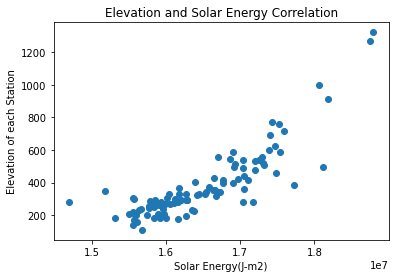

In [134]:
plt.scatter(df['energy'],df['elev'])
plt.xlabel("Solar Energy(J-m2)")
plt.ylabel("Elevation of each Station")
plt.title("Elevation and Solar Energy Correlation")
plt.show()

Above Plot shows Elevation is highly correlated with our Target Feature 

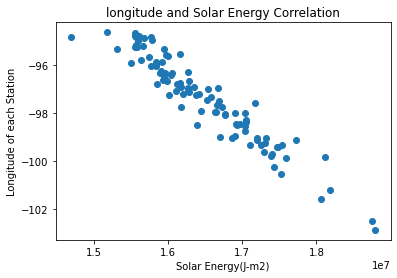

In [135]:
plt.scatter(df['energy'],df['elon'])
plt.xlabel("Solar Energy(J-m2)")
plt.ylabel("Longitude of each Station")
plt.title("longitude and Solar Energy Correlation")
plt.show()

Longitude is inversely correlated with Solar Energy

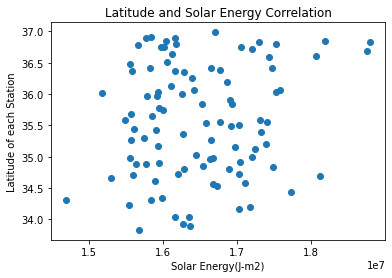

In [136]:
plt.scatter(df['energy'],df['nlat'])
plt.xlabel("Solar Energy(J-m2)")
plt.ylabel("Latitude of each Station")
plt.title("Latitude and Solar Energy Correlation")
plt.show()

In [137]:
df.corr()

,energy,nlat,elon,elev
energy,1.000000,0.152869,-0.955921,0.848218
nlat,0.152869,1.000000,-0.235067,0.385038
elon,-0.955921,-0.235067,1.000000,-0.894497
elev,0.848218,0.385038,-0.894497,1.000000


It can be seen that elevation shows highest correlation of 0.84 

In [138]:
df.describe()

,energy,nlat,elon,elev
count,9.800000e+01,98.000000,98.000000,98.000000
mean,1.649498e+07,35.571678,-97.432349,382.714286
std,7.841619e+05,0.892668,1.823683,213.047693
min,1.469244e+07,33.830130,-102.878200,110.000000
25%,1.590683e+07,34.856380,-98.723658,251.250000
50%,1.636354e+07,35.547315,-97.220975,327.500000
75%,1.703183e+07,36.380547,-96.007135,473.500000
max,1.879171e+07,36.987070,-94.644960,1322.000000


In [139]:
df=pd.read_csv('trainData6stations.csv')

In [140]:
df.columns

Index(['Unnamed: 0', 'Date', 'station', 'station elevation', 'Precipitation',
       'Downward Long Wave Rad Flux', 'Downward Short Wave Rad Flux',
       'Air Pressure', 'Water precipitation', 'Humidity', 'Cloud cover',
       'Temperature', 'Upward Long wave Rad', 'Upward Long wave Rad Atmos',
       'Upward Short Wave Rad', 'Max Temperature', 'solar energy'],
      dtype='object')

In [141]:
df.corr()

,Unnamed: 0,Precipitation,Downward Long Wave Rad Flux,Downward Short Wave Rad Flux,Air Pressure,Water precipitation,Humidity,Cloud cover,Temperature,Upward Long wave Rad,Upward Long wave Rad Atmos,Upward Short Wave Rad,Max Temperature,solar energy
Unnamed: 0,1.000000,0.007490,0.022802,-0.017216,0.003028,0.019030,0.016869,0.019302,0.025440,0.020571,0.009056,-0.027381,0.028872,-0.018041
Precipitation,0.007490,1.000000,0.225539,-0.176792,-0.003893,0.310394,0.224633,0.835162,0.016758,0.023502,-0.315228,-0.246784,0.017608,-0.313461
Downward Long Wave Rad Flux,0.022802,0.225539,1.000000,0.671283,0.422270,0.888658,0.903972,0.050825,0.827793,0.941367,0.638119,0.565463,0.811401,0.402702
Downward Short Wave Rad Flux,-0.017216,-0.176792,0.671283,1.000000,0.272997,0.553858,0.655469,-0.406712,0.784203,0.800711,0.701610,0.944138,0.739670,0.815890
Air Pressure,0.003028,-0.003893,0.422270,0.272997,1.000000,0.056161,0.059507,-0.049977,-0.029670,0.560524,0.668183,0.396346,-0.064870,0.071637
Water precipitation,0.019030,0.310394,0.888658,0.553858,0.056161,1.000000,0.962531,0.114384,0.844371,0.740282,0.343181,0.408446,0.837632,0.332872
Humidity,0.016869,0.224633,0.903972,0.655469,0.059507,0.962531,1.000000,-0.005555,0.911225,0.794710,0.445356,0.506625,0.906876,0.445349
Cloud cover,0.019302,0.835162,0.050825,-0.406712,-0.049977,0.114384,-0.005555,1.000000,-0.194036,-0.176386,-0.530516,-0.476028,-0.191296,-0.503528
Temperature,0.025440,0.016758,0.827793,0.784203,-0.029670,0.844371,0.911225,-0.194036,1.000000,0.805876,0.522875,0.614218,0.995189,0.633671
Upward Long wave Rad,0.020571,0.023502,0.941367,0.800711,0.560524,0.740282,0.794710,-0.176386,0.805876,1.000000,0.823323,0.735944,0.781180,0.555603


Above table shows Downward Long Wave Rad Flux,Temperature,Upward Long wave Rad,Upward Long wave Rad Atmos,Upward Short Wave Rad are having maximus correlation among all the predictors